# Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialgraphs2025/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 30th, 2025 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via DTU Learn

# Assignment 1.1: Exploring WS and BA models

This first part draws on the Watts-Stogatz and Barabasi-Albert models from Week 3. You should provide solutions to the exercises with the following titles from **Part 1** 

* *Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook*
* Answer: Yes.
* What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
* Answer: Random networks are not good models for real-world networks because they predict most nodes to have similar degrees around the average $\langle k \rangle$. This means there are no hubs and very few low-degree nodes, which is inconsistent with the heavy-tailed distributions observed in real networks.
* List the four regimes that characterize random networks as a function of $\langle k \rangle$.
* Answer:
1.	Subcritical regime (⟨k⟩ < 1): The network consists of many small isolated components.
2.	Critical regime (⟨k⟩ ≈ 1): A giant component starts to emerge, but it is still relatively small.
3.	Supercritical regime (⟨k⟩ > 1): A giant component contains a finite fraction of the nodes, coexisting with smaller components.
4.	Connected regime (⟨k⟩ > ln(N)): The network becomes almost surely fully connected.

* According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?
* Answer:
1.	Subcritical regime (⟨k⟩ < 1): The network consists of many small isolated components.
2.	Critical regime (⟨k⟩ ≈ 1): A giant component starts to emerge, but it is still relatively small.
3.	Supercritical regime (⟨k⟩ > 1): A giant component contains a finite fraction of the nodes, coexisting with smaller components.
4.	Connected regime (⟨k⟩ > ln(N)): The network becomes almost surely fully connected.

* *WS edition*
* First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one.
* Describe what happens to the network when $p = 1$.
* Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.
* Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).
* Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

And from **Part 2**

* *BA Edition*.
  * **Note**: The second part of this exercise (after the questions to the text) first has you build a BA network step-by-step, but doesn't ask any questions. For that part, I would simply like you to write well-documented code that shows how you build the network.


> *Exercises*: BA edition.
> 
> First a couple of questions to make sure that you've actually read the text.
> 
> * What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).
> * Answer:
> * 0 < $\gamma$ < 2: impossible to find graphical networks
> * 2 < $\gamma$ < 3: ultra-small-world, commmon in real networks
> * $\gamma$ > 3: scale-free networks with large γ are hard to distinguish from a random network.


> * What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.
> * Answer:
> * Sublinear(0 < $\alpha$ < 1): The degree distribution follows the stretched exponential, resulting in fewer and smaller hubs than in a scale-free network.
> * Linear($\alpha$ = 1): This corresponds to the Barabási-Albert model, hence the degree distribution follows a power law.
> * Superlinear($\alpha$ > 1): A winner-takes-all dynamics leads to a hub-and-spoke topology.
> 
> We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success:
> 
> * First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
> * Now add another node, connecting one of the existing nodes in proportion to their degree.
> * Keep going until you have a 100 node network.
>   * *Hint*: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using `random.choice`) corresponds to selecting a node with probability proportional to it's degree.
> * Plot the network. 
> * Add more nodes until you have a 5000 node network.
> * What's the maximum and minimum degree?
> * Now, bin the degree distribution using `numpy.histogram`.
> * Plot the distribution. Plot it with both linear and log-log axes.
> 
> ![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ba.png)

<div class="alert alert-block alert-info">
As above, I recommend you try this on your own. It's so cool to experience that you can actually code up a BA network on your own ... and that it's not that difficult. See if you can figure out how to do the plotting and get the bins right (*remember last week's exercise*), and as always, it's OK to ask your LLM for help with the styling. 
</div>

In [1]:
### WS edition Question 1
import networkx as nx

# Parameters
N = 500
k = 4
ps = [0, 0.1, 1]

for p in ps:
    G = nx.watts_strogatz_graph(n=N, k=k, p=p)
    print(f"p = {p}, average shortest path length = {nx.average_shortest_path_length(G)}")

p = 0, average shortest path length = 62.875751503006015
p = 0.1, average shortest path length = 7.453571142284569
p = 1, average shortest path length = 4.759438877755511


## WS edition Question2 - Describe what happens to the network when p = 1

When p = 1, the WS network turns completely random. That makes the average shortest path really short, so any two nodes are just a few steps apart, but the clustering almost disappears since the local structure is gone.

## WS edition Question3 - Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.

When p = 0, the average path length ⟨d⟩ is very large. From the plot in Q4, we can see that as soon as p increases a little, ⟨d⟩ drops very fast. Around p = 0.1–0.2, the curve is already close to the level of a fully random network. So based on the figure, only a small amount of rewiring is enough to make the WS network behave like a random graph in terms of path length.

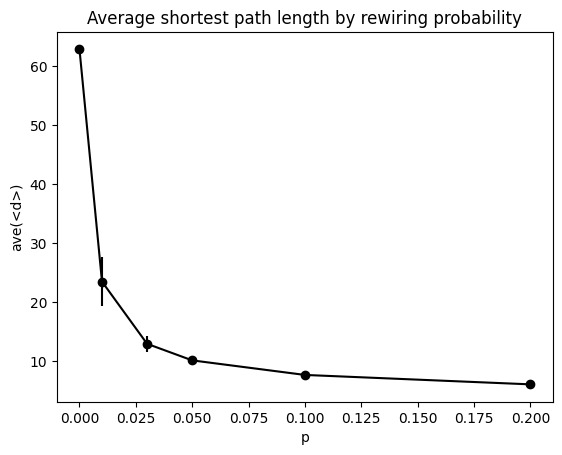

In [2]:
### WS edition Question 4 - Let's investigate this behavior in detail. Generate 50 networks with N = 500, k = 4, for each of p = {0, 0.01, 0.03, 0.05, 0.1, 0.2\}. 

import numpy as np
import matplotlib.pyplot as plt

N = 500
k = 4
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
avg_path_lengths = []
std_devs = []

for p in p_values:
    lengths = []
    for _ in range(50):
        G = nx.watts_strogatz_graph(N, k, p)
        d = nx.average_shortest_path_length(G)
        lengths.append(d)
    avg_path_lengths.append(np.mean(lengths))
    std_devs.append(np.std(lengths))

plt.errorbar(p_values, avg_path_lengths, yerr=std_devs, fmt='o-', color='black')
plt.title("Average shortest path length by rewiring probability")
plt.xlabel("p")
plt.ylabel("ave(<d>)")
plt.show()

## WS edition Question4
The figure above shows the average shortest path length ⟨d⟩ as a function of the rewiring probability p in WS networks with N = 500 and k = 4. Each point is the average of 50 runs, and the error bars show the standard deviation. We can see that even when p is just a bit above zero, the path length already drops a lot, which means a few random shortcuts can make the network much smaller.

## BE edition Step1 - First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).

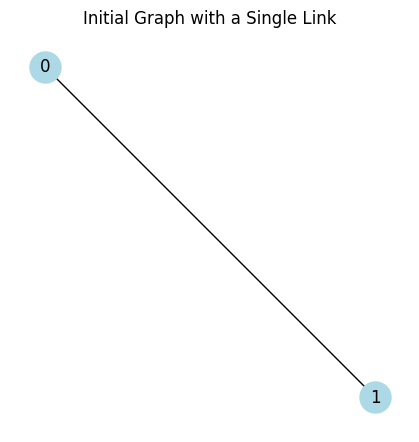

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph with only two nodes(0 and 1), plus an edge
G = nx.Graph()
G.add_edge(0, 1)

# plot 
plt.figure(figsize=(4, 4))
nx.draw(G, with_labels=True, node_color="lightblue", node_size=500, font_size=12)
plt.title("Initial Graph with a Single Link")
plt.show()

## BE edition Step2 - Now add another node, connecting one of the existing nodes in proportion to their degree.

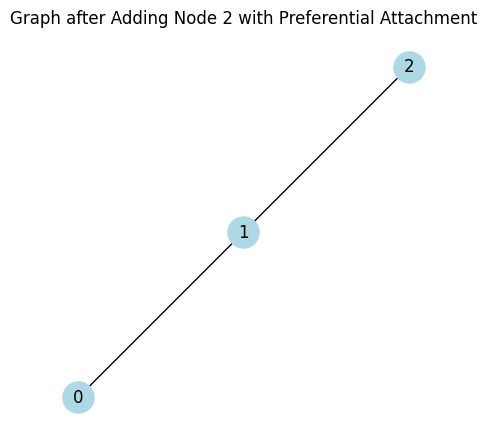

In [4]:
import random

# the new node's label
new_node = 2  

# Get all exsiting nodes and their degrees
nodes = list(G.nodes())
degrees = [G.degree(n) for n in nodes]

# Create a weighted list of nodes proportional to their degree
weighted_nodes = []
for node, degree in zip(nodes, degrees):
    weighted_nodes.extend([node] * degree)

# Randomly pick a target node from the weighted list
target = random.choice(weighted_nodes)

# Add the new edge
G.add_edge(new_node, target)

# Plot
plt.figure(figsize=(4, 4))
nx.draw(G, with_labels=True, node_color="lightblue", node_size=500, font_size=12)
plt.title("Graph after Adding Node 2 with Preferential Attachment")
plt.show()

## BE edition Step3 - Keep going until you have a 100 node network

Number of nodes: 100
Number of edges: 99


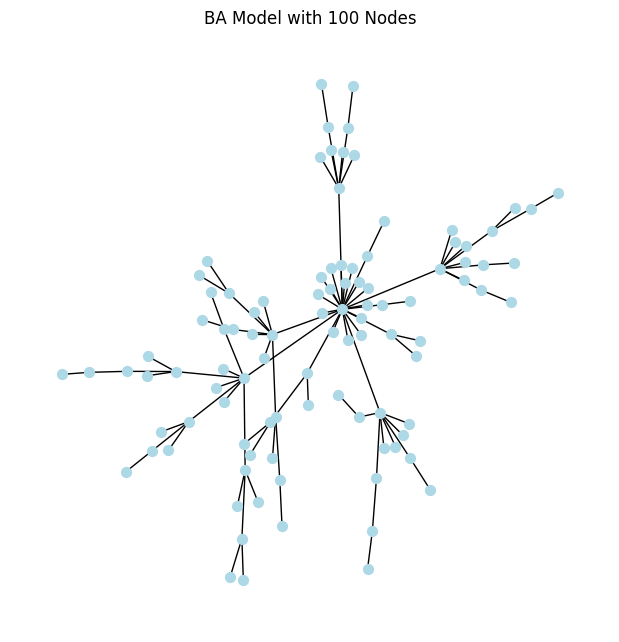

In [5]:
# Add a new node to the graph using preferential attachment.
def add_node_preferential(G, new_node):

    nodes = list(G.nodes())
    degrees = [G.degree(n) for n in nodes]

    # Build weighted list of nodes proportional to degree
    weighted_nodes = []
    for node, degree in zip(nodes, degrees):
        weighted_nodes.extend([node] * degree)

    # Randomly choose one target node
    target = random.choice(weighted_nodes)

    # Add new edge
    G.add_edge(new_node, target)


# Start adding nodes until we reach 100
for new_node in range(3, 100):  # nodes 0,1,2 already exist
    add_node_preferential(G, new_node)

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Plot the network
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=False, node_color="lightblue", node_size=50)
plt.title("BA Model with 100 Nodes")
plt.show()

## BE edition Step4 - Add more nodes until you have a 5000 node network and find the max and min degree.

In [6]:
for new_node in range(100, 5000):
    add_node_preferential(G, new_node)

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Calculate degrees
degrees = [deg for node, deg in G.degree()]

# Find max and min degree
print("Maximum degree:", max(degrees))
print("Minimum degree:", min(degrees))

Number of nodes: 5000
Number of edges: 4999
Maximum degree: 186
Minimum degree: 1


## BE edition Step5 - Now, bin the degree distribution using numpy.histogram. Plot the distribution. Plot it with both linear and log-log axes.

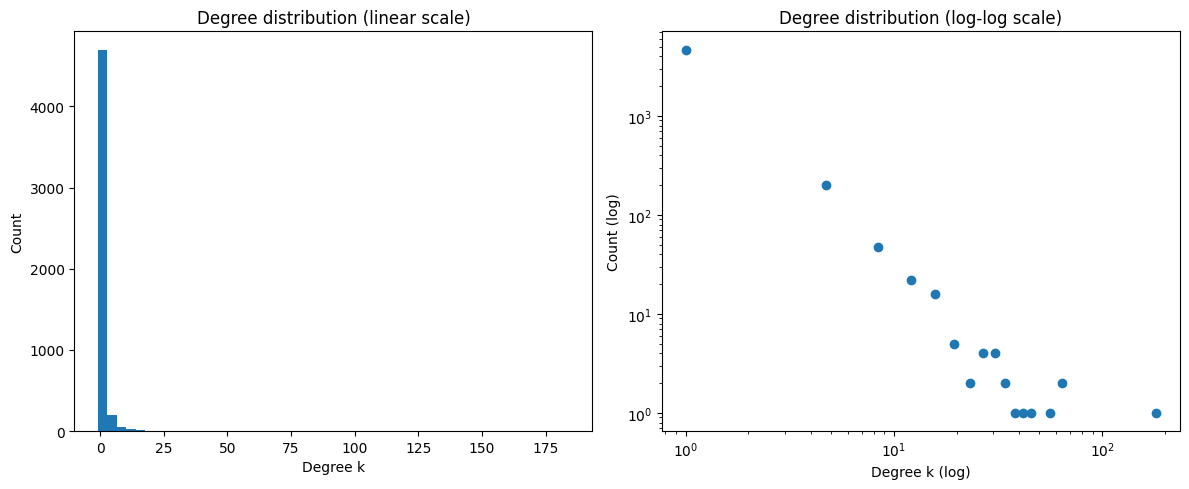

In [7]:
import numpy as np

# Bin the degree distribution
hist, bins = np.histogram(degrees, bins=50)

# Plot in linear scale
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(bins[:-1], hist, width=np.diff(bins))
plt.xlabel("Degree k")
plt.ylabel("Count")
plt.title("Degree distribution (linear scale)")

# Plot in log-log scale
plt.subplot(1, 2, 2)
plt.scatter(bins[:-1], hist)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree k (log)")
plt.ylabel("Count (log)")
plt.title("Degree distribution (log-log scale)")

plt.tight_layout()
plt.show()

# Assignment 1.2: Stats and visualization of the Rock Music Network

This second part requires you to have built the network of Rock Musicians as described in the exercises for Week 4. You should complete the following exercise from **Part 2**.

* *Explain your process in words*

* *Simple network statistics and analysis*.

  * **Note related to this and the following exercise**. It is nice to have the dataset underlying the statistics and visualization available when we grade. Therefore, I recommend that you create a small *network dataset*, which is simply your graph stored in some format that you like (since it's only a few hundred nodes and a few thousand edges, it won't take up a lot of space). You can then place that network one of your group members' GitHub account (or some other server that's available online) and have your Jupyter Notebook fetch that dataset when it runs. (It's OK to use an LLM for help with setting this up, if it seems difficult). 

And the following exercise from **Part 3**

* *Let's build a simple visualization of the network*

And that's it! You're all set.

The relevant datasets and generated images can be accessed via the following link:

https://github.com/TROY571/02805-Assignment-1-datasets-and-images

# Part 2: Building the networks

In [8]:
# Extracted artist links from Wiki page content
import re
from urllib.parse import quote

def extract_artist_links(source_file, output_file="artists_links.txt"):
    """
    Extract Wikipedia artist links from a rock.txt file and save them to a file.
    """
    with open(source_file, encoding="utf-8") as f:
        text = f.read()

    # Match only lines starting with '* [[' or '*[['
    # Capture everything between [[ and ]]
    pattern = re.compile(r"^\*\s*\[\[([^\]]+)\]\]", re.MULTILINE)

    links = []
    for match in pattern.finditer(text):
        inner = match.group(1).strip()
        if ":" in inner:
            continue  # skip Category:, File:, etc.

        # Take the left side if there's a pipe
        artist_page = inner.split("|")[0].strip()

        # URL generation
        url = f"https://en.wikipedia.org/wiki/{quote(artist_page.replace(' ', '_'))}"
        links.append(url)

    # Deduplicate and sort
    links = sorted(set(links))

    # Write links to file
    with open(output_file, "w", encoding="utf-8") as f:
        for link in links:
            f.write(link + "\n")

    print(f"Extracted {len(links)} artist links → {output_file}")


if __name__ == "__main__":
    extract_artist_links("rock.txt", "artists_links.txt")

Extracted 488 artist links → artists_links.txt


In [9]:
# Save all the pages content
import requests
import os
import time
from urllib.parse import unquote
import re

# --- Settings ---
input_file = "artists_links.txt"
output_dir = "rock_artists_pages"
os.makedirs(output_dir, exist_ok=True)

WIKI_API_URL = "https://en.wikipedia.org/w/api.php"

# --- Function to sanitize filenames ---
def sanitize_filename(name):
    # Remove or replace characters invalid in Windows filenames
    return re.sub(r'[<>:"/\\|?*]', '_', name)

# --- Load artist links and extract page titles ---
artist_links = []
with open(input_file, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        if line.startswith("https://en.wikipedia.org/wiki/"):
            title = line.split("/wiki/")[-1]
        else:
            title = line
        title = unquote(title)
        artist_links.append(title)

print(f"Total artists found: {len(artist_links)}")

# --- Function to fetch wikitext ---
def fetch_wikitext(page_title):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                      "AppleWebKit/537.36 (KHTML, like Gecko) "
                      "Chrome/140.0.0.0 Safari/537.36"
    }
    params = {
        "action": "query",
        "format": "json",
        "titles": page_title,
        "prop": "revisions",
        "rvprop": "content",
        "redirects": 1
    }
    try:
        response = requests.get(WIKI_API_URL, params=params, headers=headers, timeout=10)
        response.raise_for_status()
        data = response.json()
        pages = data.get("query", {}).get("pages", {})
        for page_id, page_data in pages.items():
            if "revisions" in page_data:
                return page_data["revisions"][0]["*"]
    except requests.exceptions.RequestException as e:
        print(f"HTTP error fetching {page_title}: {e}")
    except ValueError as e:
        print(f"JSON decode error for {page_title}: {e}")
    return None

# --- Iterate over artists and save pages ---
for title in artist_links:
    page_title = title.replace(" ", "_")
    safe_filename = sanitize_filename(page_title)
    filename = os.path.join(output_dir, f"{safe_filename}.txt")
    
    if os.path.exists(filename):
        print(f"Skipping (already downloaded): {page_title}")
        continue
    
    print(f"Fetching: {page_title}")
    wikitext = fetch_wikitext(page_title)
    
    if wikitext:
        with open(filename, "w", encoding="utf-8") as f:
            f.write(wikitext)
    else:
        print(f"Warning: Could not fetch page for {page_title}")
    
    time.sleep(0.5)

Total artists found: 488
Skipping (already downloaded): 10_Years_(band)
Skipping (already downloaded): 10cc
Skipping (already downloaded): 311_(band)
Skipping (already downloaded): 38_Special_(band)
Skipping (already downloaded): 3_Doors_Down
Skipping (already downloaded): ABBA
Skipping (already downloaded): AC/DC
Skipping (already downloaded): AFI_(band)
Skipping (already downloaded): A_Perfect_Circle
Skipping (already downloaded): Accept_(band)
Skipping (already downloaded): Adam_Ant
Skipping (already downloaded): Aerosmith
Skipping (already downloaded): Air_Supply
Skipping (already downloaded): Alanis_Morissette
Skipping (already downloaded): Alice_Cooper
Skipping (already downloaded): Alice_Cooper_(band)
Skipping (already downloaded): Alice_in_Chains
Skipping (already downloaded): Alter_Bridge
Skipping (already downloaded): Ambrosia_(band)
Skipping (already downloaded): America_(band)
Skipping (already downloaded): Anthrax_(American_band)
Skipping (already downloaded): April_Wine
S

In [10]:
import os
import re
import networkx as nx

# -----------------------
# Sanitize performer names like Part 1
# -----------------------
def sanitize_filename(name):
    """Replace characters invalid in Windows filenames with underscore."""
    # Replace spaces and invalid characters with _
    return re.sub(r'[<>:"/\\|?* ]', '_', name)

# -----------------------
# Step 1: Load performers from folder
# -----------------------
data_dir = "rock_artists_pages"
performer_files = sorted(os.listdir(data_dir))

# Use sanitized filenames as performer identifiers
performer_set = set([os.path.splitext(f)[0] for f in performer_files])
performer_names = sorted(performer_set)

print(f"Found {len(performer_names)} performer pages.")

# -------------------------------
# Step 2: Function to extract links
# -------------------------------
def extract_links_from_page(text):
    """
    Extract links to other performers from Wikipedia page text.
    Links are in the form [[Artist]] or [[Artist|Label]].
    Only keep links that are in performer_set.
    """
    pattern = re.compile(r"\[\[([^\]]+)\]\]")  # [[Artist]] or [[Artist|Label]]
    links = []
    for match in pattern.finditer(text):
        inner = match.group(1).strip()

        # Take the left side if there's a pipe
        artist_page = inner.split("|")[0].strip()

        # Sanitize like Part 1 (spaces and invalid chars → _)
        artist_page = sanitize_filename(artist_page)

        links.append(artist_page)
    return links

# ------------------------
# Step 3: Build the network
# ------------------------
G = nx.DiGraph()

for idx, performer_name in enumerate(performer_names, 1):
    print(f"[{idx}/{len(performer_names)}] Processing: {performer_name}")

    file_path = os.path.join(data_dir, f"{performer_name}.txt")
    if not os.path.exists(file_path):
        print(f"  -> Missing page: {performer_name}")
        continue

    with open(file_path, encoding="utf-8") as f:
        text = f.read()

    # Count words in page
    word_count = len(re.findall(r"\w+", text))

    # Add performer node
    G.add_node(performer_name, word_count=word_count)

    # Extract links and add edges
    links = extract_links_from_page(text)

    # Filter only performers
    valid_links = [target for target in links if target in performer_set]

    # Debug: only print performer links for the first page
    if idx == 1:
        print("DEBUG - Performer links (sanitized):", valid_links)

    # Add edges
    edge_count = 0
    for target in valid_links:
        G.add_edge(performer_name, target)
        edge_count += 1
    print(f"  -> Added {edge_count} edges")

# ----------------------------------
# Step 4: Remove isolated performers
# ----------------------------------
isolated = list(nx.isolates(G))
G.remove_nodes_from(isolated)
print(f"Removed {len(isolated)} isolated performers.")

# ----------------------------------------------------
# Step 5: Keep only the largest weakly connected component
# ----------------------------------------------------
largest_cc = max(nx.weakly_connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()

print(f"Final network: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

Found 488 performer pages.
[1/488] Processing: 10_Years_(band)
DEBUG - Performer links (sanitized): ['Disturbed_(band)', 'Breaking_Benjamin', 'Mudvayne', 'Korn', 'Deftones', 'Stone_Temple_Pilots', 'Thousand_Foot_Krutch', 'Linkin_Park', 'Shinedown', 'Puddle_of_Mudd', 'Breaking_Benjamin']
  -> Added 11 edges
[2/488] Processing: 10cc
  -> Added 24 edges
[3/488] Processing: 311_(band)
  -> Added 23 edges
[4/488] Processing: 38_Special_(band)
  -> Added 17 edges
[5/488] Processing: 3_Doors_Down
  -> Added 15 edges
[6/488] Processing: ABBA
  -> Added 13 edges
[7/488] Processing: AC_DC
  -> Added 31 edges
[8/488] Processing: AFI_(band)
  -> Added 10 edges
[9/488] Processing: A_Perfect_Circle
  -> Added 22 edges
[10/488] Processing: Accept_(band)
  -> Added 22 edges
[11/488] Processing: Adam_Ant
  -> Added 12 edges
[12/488] Processing: Aerosmith
  -> Added 66 edges
[13/488] Processing: Air_Supply
  -> Added 3 edges
[14/488] Processing: Alanis_Morissette
  -> Added 23 edges
[15/488] Processing:

* *Explain your process in words*

Answer:
1. Process Overview

Copy the entire content of the wiki page to a plain text file on my computer

Extract all of the artist-links using my regular expressions

Download all the cleanest performer pages

Load performers pages from folder

Build the performer set: From the folder containing all downloaded pages, extract all filenames and sanitize them in the same way to create a complete set of performer names. This set was used to verify which links actually point to other performers.

Extract links from each page: For each performer page, use a regular expression to find all links of the form. Filter out any links are not performers.

Build the directed network: Create a NetworkX DiGraph and add each performer as a node.

Clean the network: Remove isolated performers. Extract the largest weakly connected component to focus on the main connected network.

2. Difficulties Encountered

I think the most difficult step is extracting all artist links from Wikipedia and ensuring that the links are valid and the count is correct.

3. Using LLM Assistance

LLM helped me in fine-tuning regular expressions for safely extracting links from Wikipedia pages and for checking logic for mapping links to performers in the dataset. The LLM was also helped checking the procedure for cleaning isolated nodes and picking out the biggest component.

4. Improvements for Next Time

I would preprocess the Wikipedia pages more extensively prior to extracting links. There are often pages that include references, citation templates, and other metadeta (e.g., <ref>.</ref>, {{cite web}}) that introduce noise and have a tendency to create invalid or deceptive links. If these sections are removed beforehand, then the regular expression will only process the true page content and will introduce less chance of edges from non-performer pages and create a cleaner and more precise network.

*Exercise*: Simple network statistics and analysis
> * What is the number of nodes in the network? 

Answer: 487 nodes

> * More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)

Answer: 7371 edges


> * Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?

Answer:

I observe two distinct patterns in the degree distributions of rock performer network.

​In-degree distribution (Left plot):​​ This shows a highly right-skewed, "heavy-tailed" pattern. The vast majority of performers have a very low number of incoming links (close to zero), while a very small number of performers are "hubs" with an extremely high in-degree (up to 120). This is characteristic of a ​scale-free network.

​Out-degree distribution (Right plot):​​ This shows a much more "normal" distribution. Most performers have a moderate number of outgoing links (centered around 10), and it is rare to find performers with a very low or very high out-degree. The distribution is more balanced.

The difference arises from the network's growth mechanism. The ​in-degree​ reflects famous bands are linked to from many newer band pages, making them highly connected hubs.

Conversely, the ​out-degree​ is constrained by the content of a single Wikipedia page. Each page has a natural limit to the number of relevant outgoing links it can contain, leading to a more uniform distribution around a typical value.

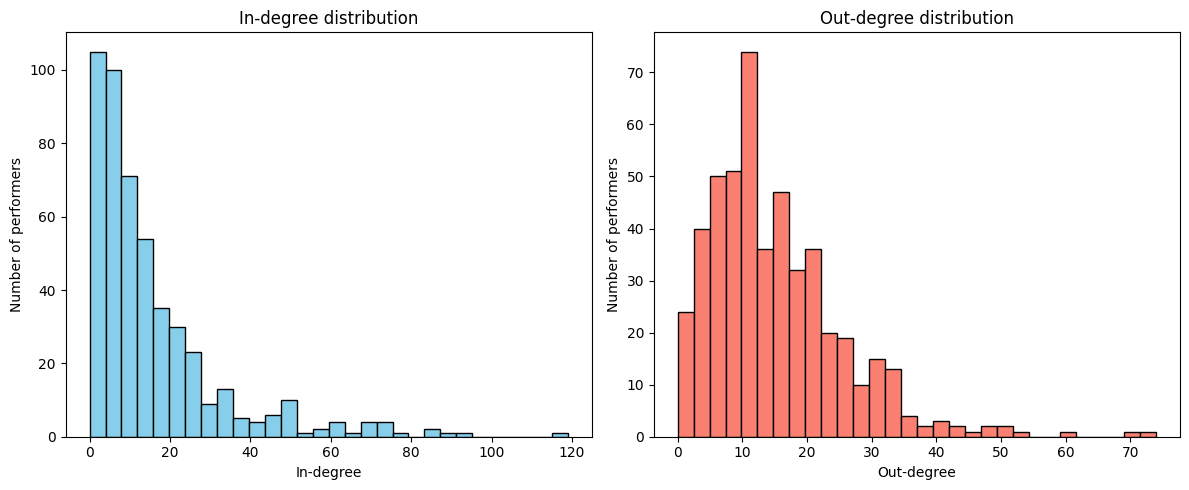

In [11]:
import matplotlib.pyplot as plt

in_degrees = [d for n, d in G.in_degree()]
out_degrees = [d for n, d in G.out_degree()]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(in_degrees, bins=30, color='skyblue', edgecolor='black')
plt.title("In-degree distribution")
plt.xlabel("In-degree")
plt.ylabel("Number of performers")

plt.subplot(1, 2, 2)
plt.hist(out_degrees, bins=30, color='salmon', edgecolor='black')
plt.title("Out-degree distribution")
plt.xlabel("Out-degree")
plt.ylabel("Number of performers")

plt.tight_layout()
plt.show()

> * Compare the out-degree distribution to a *random network* with the same number of nodes and links.

Answer:

The real network has a long tail of pages with a very high number of outgoing links. A random network with the same size  don't have these outliers. Random network is closer to the Poisson distribution.

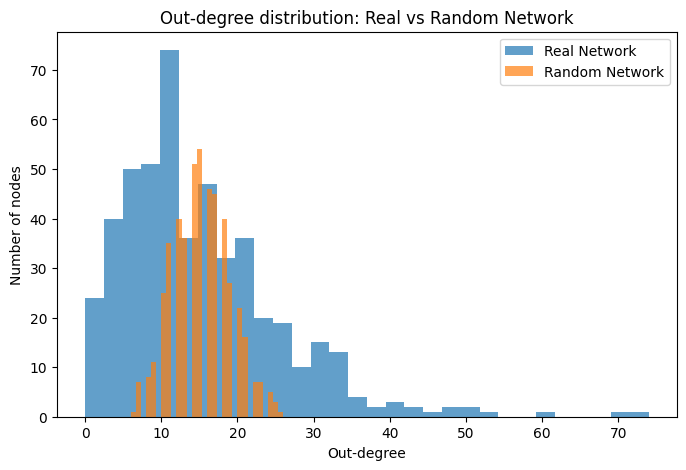

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()

# Generate directed random network with same nodes and edges
random_G = nx.gnm_random_graph(n_nodes, n_edges, directed=True)

# Extract out-degrees
real_out_deg = [d for n, d in G.out_degree()]
rand_out_deg = [d for n, d in random_G.out_degree()]

# Plot
plt.figure(figsize=(8,5))
plt.hist(real_out_deg, bins=30, alpha=0.7, label="Real Network")
plt.hist(rand_out_deg, bins=30, alpha=0.7, label="Random Network")
plt.xlabel("Out-degree")
plt.ylabel("Number of nodes")
plt.title("Out-degree distribution: Real vs Random Network")
plt.legend()
plt.show()

> * Compare the in-degree distribution to a *scale-free* network with the same number of nodes.

Answer:

The real network has a hierarchy, but it is not as extreme as a scale-free network. The "rich-get-richer" effect is present but much weaker, there's no single node dominates the network.

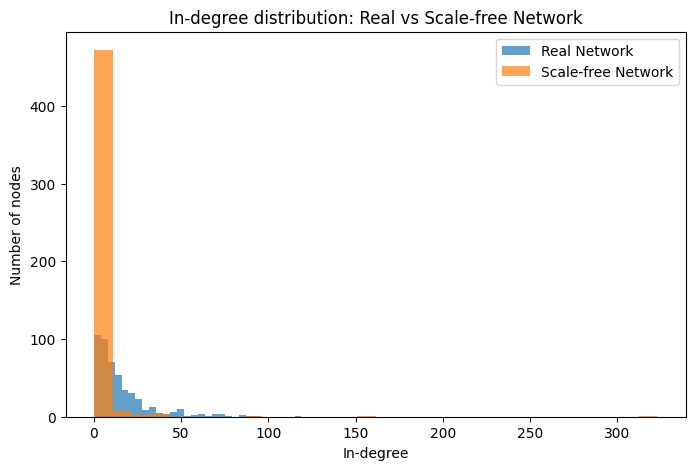

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

sf_G = nx.scale_free_graph(n_nodes, seed=42)  # note: directed

# Extract in-degrees
real_in_deg = [d for n, d in G.in_degree()]
sf_in_deg = [d for n, d in sf_G.in_degree()]

# Plot
plt.figure(figsize=(8,5))
plt.hist(real_in_deg, bins=30, alpha=0.7, label="Real Network")
plt.hist(sf_in_deg, bins=30, alpha=0.7, label="Scale-free Network")
plt.xlabel("In-degree")
plt.ylabel("Number of nodes")
plt.title("In-degree distribution: Real vs Scale-free Network")
plt.legend()
plt.show()

> * Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?

Answer:

The results are below.
Led_Zeppelin has highest in-degree and Alice_in_Chains has highest out-degree.

The in-degree list is pretty much what I'd expect. Even someone like me who doesn't listen to rock music knows these people's name, they're very famous.



In [14]:
# Top 5 by in-degree
top_in = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 performers by in-degree:")
for name, deg in top_in:
    print(f"{name}: {deg} incoming links")

# Top 5 by out-degree
top_out = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 performers by out-degree:")
for name, deg in top_out:
    print(f"{name}: {deg} outgoing links")

Top 5 performers by in-degree:
Led_Zeppelin: 119 incoming links
Bob_Dylan: 95 incoming links
Queen_(band): 88 incoming links
Metallica: 85 incoming links
David_Bowie: 84 incoming links

Top 5 performers by out-degree:
Alice_in_Chains: 74 outgoing links
Deep_Purple: 71 outgoing links
Black_Sabbath: 60 outgoing links
Def_Leppard: 52 outgoing links
Bryan_Adams: 51 outgoing links


> * What are the 10 pages with the longest wiki entries? (use the `length of content` attribute to figure this one out)?

Answer:

The results are below

Guns_N'_Roses: 60853 words

Coldplay: 47026 words

Queen_(band): 46197 words

Marilyn_Manson_(band): 46032 words

The_Rolling_Stones: 44022 words

U2: 43048 words

Bob_Dylan: 42509 words

David_Bowie: 42408 words

Paul_McCartney: 42407 words

Elton_John: 41255 words

In [15]:
# Use the word_count node attribute
longest_pages = sorted(G.nodes(data=True), key=lambda x: x[1]['word_count'], reverse=True)[:10]

print("10 pages with the longest content:")
for name, attr in longest_pages:
    print(f"{name}: {attr['word_count']} words")

10 pages with the longest content:
Guns_N'_Roses: 60853 words
Coldplay: 47026 words
Queen_(band): 46197 words
Marilyn_Manson_(band): 46032 words
The_Rolling_Stones: 44022 words
U2: 43048 words
Bob_Dylan: 42509 words
David_Bowie: 42408 words
Paul_McCartney: 42407 words
Elton_John: 41255 words


# Part 3: Visualizing the networks

*Exercise:* Let's build a simple visualization of the network

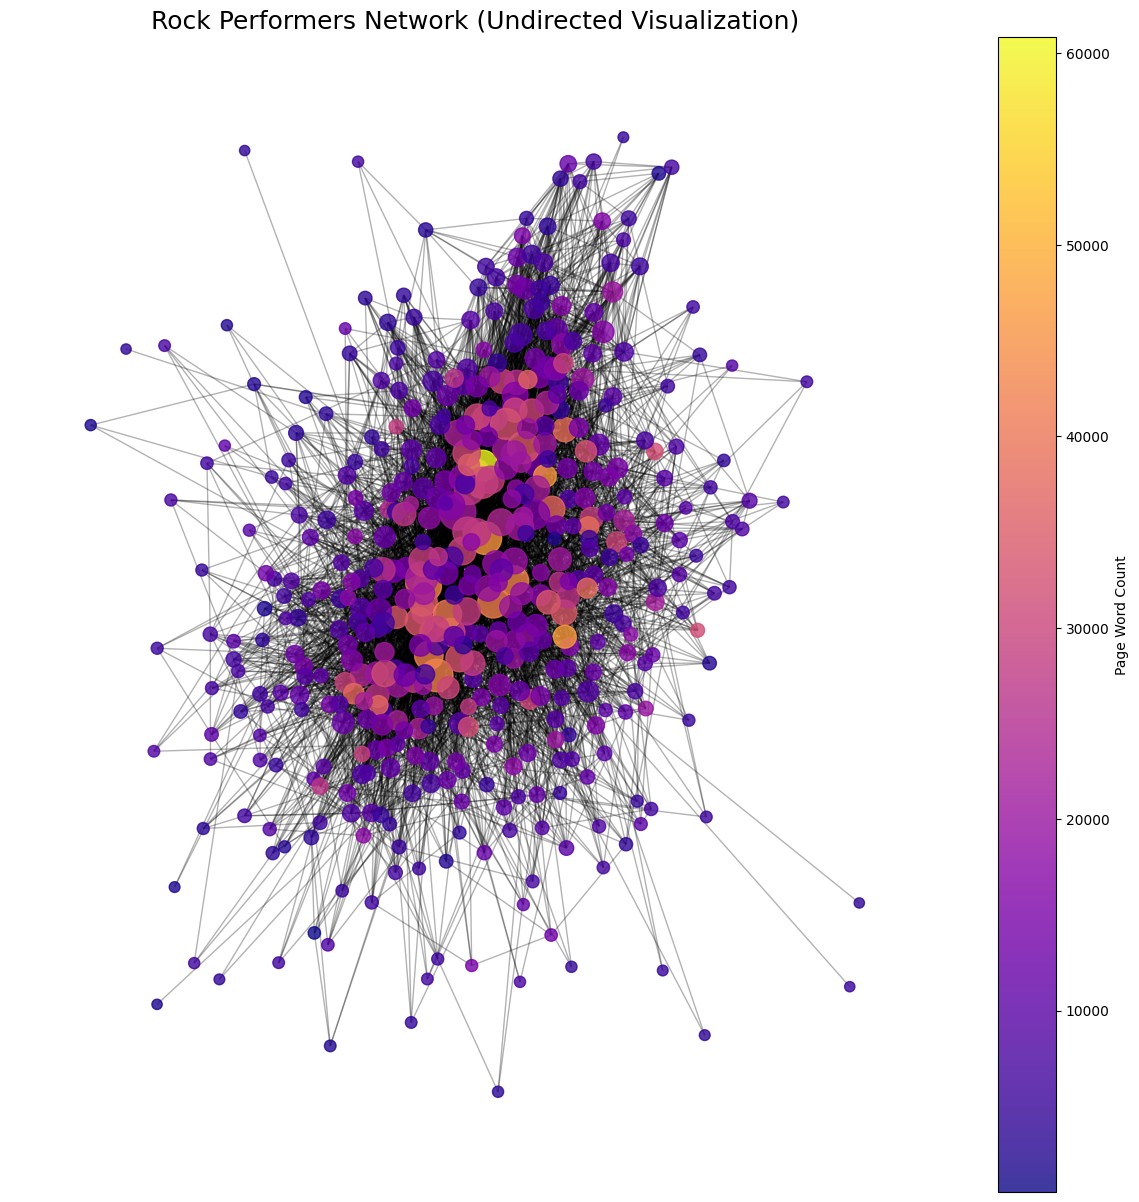

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

# Convert to undirected graph for visualization
G_undirected = G.to_undirected()

plt.figure(figsize=(15, 15))

# Use spring layout (or Kamada-Kawai)
pos = nx.spring_layout(G_undirected, k=0.15, iterations=50, seed=42)

# Node size proportional to degree
node_sizes = [50 + 5 * G_undirected.degree(n) for n in G_undirected.nodes()]

# Node color based on word count (length of content)
node_colors = []
for n, data in G_undirected.nodes(data=True):
    wc = data.get("word_count", 1)  # fallback to 1 if missing
    node_colors.append(wc)

# Draw nodes with a sequential colormap
nodes = nx.draw_networkx_nodes(
    G_undirected,
    pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.plasma,  # simple sequential colormap
    alpha=0.8
)

# Draw edges
edges = nx.draw_networkx_edges(G_undirected, pos, alpha=0.3)

# Title and colorbar
plt.title("Rock Performers Network (Undirected Visualization)", fontsize=18)
plt.colorbar(nodes, label="Page Word Count")
plt.axis("off")
plt.show()